import all usefull tool

In [1]:
%pylab inline

import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#https://github.com/kjam/random_hackery/blob/master/Attempting%20to%20detect%20fake%20news.ipynb

Populating the interactive namespace from numpy and matplotlib


# Read in Datasets

## Load Dataset 1 - fake_or_real_news.csv
Read in File fake_or_real_news.csv

In [2]:
df = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/fake_or_real_news.csv')

ignores first column

In [3]:
df = df.set_index('Unnamed: 0')

quick view at the data

In [4]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


store label column with the classification of each text

In [5]:
#store label before dropping it
bin_y = df.label
#y.head()

cut of label column to get an unlabled array

In [6]:
df = df.drop('label', axis=1)

from skikit learn the function: train_test_split
* in the dataframe  get text column by df['text']
* use stored y label df
* use seed 4222
* determine split size: in this case 0.25
* **take care that these config is the same to get compareable results**

In [7]:
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(df['text'], bin_y, test_size=0.25, random_state=4222)

## Load Dataset 2 - liar_dataset.zip
* Read in File liar_dataset.zip
* cause of three file read in each file on its own and assign it to train test vaidation 

#### So first train set

* only use the text part and ignore the others
* it would also be possible to for example to concatiate the other information ito the text part but youll lose the robustness againstother datasets without these coulums and you'll mix up information

In [8]:
#training data file
df = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/train.tsv', delimiter="\t", header=None, usecols=[1,2], names=['y', 'claim'])

In [9]:
df.head()

,y,claim
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [10]:
mul_X_train = df.claim
mul_y_train = df.y

#### second dataset: test set

In [11]:
#test data file
df = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/test.tsv', delimiter="\t", header=None, usecols=[1,2], names=['y', 'claim'])

In [12]:
df.head()

,y,claim
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...
3,half-true,Suzanne Bonamici supports a plan that will cut...
4,pants-fire,When asked by a reporter whether hes at the ce...


In [13]:
mul_X_test = df.claim
mul_y_test = df.y

#### as third dataset: validation set

In [14]:
#test data file
df = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/valid.tsv', delimiter="\t", header=None, usecols=[1,2], names=['y', 'claim'])

In [15]:
mul_X_valid = df.claim
mul_y_valid = df.y

In [16]:
print(type(mul_X_valid))

<class 'pandas.core.series.Series'>


## Generate Dataset 3
* using code from Diego by copy paste with some small modifications
* thanks for distributing this code @diego ;)

In [17]:
'''import random
import sys
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

ds1 = sys.argv[1]
ds2 = sys.argv[2]'''

try:
    print('-- fake news')
    df1 = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/fake_or_real_news.csv', sep=',', usecols=['title','text','label'])
    df1['claim'] = df1[['title', 'text']].apply(lambda x: '. '.join(x), axis=1)
    del df1['title']
    del df1['text']
    df1.rename(index=str, columns={'label': 'y'}, inplace=True)
    print(df1.keys())
    print(len(df1[df1['y']=='REAL']))
    print(len(df1[df1['y']=='FAKE']))
    df1['y'] = np.where(df1['y'] == 'FAKE', 'false', 'true')
    print(len(df1))

    print('-- liar liar')
    df2 = pd.read_csv('/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/train.tsv', sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
    print(df2.keys())
    print(set(df2.y), len(df2))
    print(len(df2[df2['y'] == 'true']))
    print(len(df2[df2['y'] == 'false']))
    df2=df2[(df2['y'] == 'true') | (df2['y'] == 'false')]
    print(set(df2.y), len(df2))

    df3=pd.concat([df1, df2], ignore_index=True)

    print(df3['y'].value_counts())
    print('done')
    concat_X_train, concat_X_test, concat_y_train, concat_y_test = train_test_split(df3['claim'], df3['y'], test_size=0.25, random_state=4222)
    
    
except Exception as e:
    print(e)

-- fake news
Index(['y', 'claim'], dtype='object')
3171
3164
6335
-- liar liar
Index(['y', 'claim'], dtype='object')
{'true', 'pants-fire', 'false', 'barely-true', 'mostly-true', 'half-true'} 10240
1676
1995
{'true', 'false'} 3671
false    5159
true     4847
Name: y, dtype: int64
done


# Vectorizer Classifiers
* tfids removes words in pregenerating the vectors by evaluating if this word appears more than 70% often in all articles (tfidf)
* an immense naive approach would be to store a set of the over all occuring word in all the texts and for each text determining how often this word occurs.
* also testing some min df thresholds as lower bound for regarded occurences of words over all texts ... not easy to predict if this is a good idea

### Generate Vectorizer on Binary Classes

generate two different vectorizers

In [18]:
#building the vectorspace
bin_count_vectorizer = CountVectorizer(stop_words='english')
bin_count_train = bin_count_vectorizer.fit_transform(bin_X_train)
#transform  the other sets into same feature vector as trained on train data 
bin_count_test = bin_count_vectorizer.transform(bin_X_test)

In [19]:
#building the vectorspace
bin_tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)#, min_df=0.0005)
bin_tfidf_train = bin_tfidf_vectorizer.fit_transform(bin_X_train)
#transform  the other sets into same feature vector as trained on train data 
bin_tfidf_test = bin_tfidf_vectorizer.transform(bin_X_test)

a short look on the last 10 tokens for the vectors

In [20]:
bin_tfidf_vectorizer.get_feature_names()[-10:]

['تنجح', 'حلب', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [21]:
bin_count_vectorizer.get_feature_names()[-10:]#[:10]

['تنجح', 'حلب', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

### Generate Vectorizer on Multilabel Classes
* same again
* only additional transform for validation set

In [22]:
mul_count_vectorizer = CountVectorizer(stop_words='english')
mul_count_train = mul_count_vectorizer.fit_transform(mul_X_train)
mul_count_test = mul_count_vectorizer.transform(mul_X_test)
mul_count_valid = mul_count_vectorizer.transform(mul_X_valid)

In [23]:
mul_tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)#, min_df=0.0005)
mul_tfidf_train = mul_tfidf_vectorizer.fit_transform(mul_X_train)
mul_tfidf_test = mul_tfidf_vectorizer.transform(mul_X_test)
mul_tfidf_valid = mul_tfidf_vectorizer.transform(mul_X_valid)

In [24]:
mul_tfidf_vectorizer.get_feature_names()[-10:]

['zip',
 'zippo',
 'zombie',
 'zombies',
 'zone',
 'zones',
 'zoning',
 'zoo',
 'zuckerberg',
 'zuckerbergs']

In [25]:
mul_count_vectorizer.get_feature_names()[-10:]#[:10]

['zip',
 'zippo',
 'zombie',
 'zombies',
 'zone',
 'zones',
 'zoning',
 'zoo',
 'zuckerberg',
 'zuckerbergs']

### Generate Vectors on merged Sets
* again the same ...

In [26]:
concat_count_vectorizer = CountVectorizer(stop_words='english')
concat_count_train = concat_count_vectorizer.fit_transform(concat_X_train)
concat_count_test = concat_count_vectorizer.transform(concat_X_test)

In [27]:
concat_tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)#, min_df=0.0005)
concat_tfidf_train = concat_tfidf_vectorizer.fit_transform(concat_X_train)
concat_tfidf_test = concat_tfidf_vectorizer.transform(concat_X_test)

In [28]:
concat_tfidf_vectorizer.get_feature_names()[-10:]

['القادمون',
 'ایران',
 'جنگ',
 'سال',
 'عربي',
 'علیه',
 'مطالعاتی',
 'مورد',
 'کدآمایی',
 'ยงade']

In [29]:
concat_count_vectorizer.get_feature_names()[-10:]#[:10]

['القادمون',
 'ایران',
 'جنگ',
 'سال',
 'عربي',
 'علیه',
 'مطالعاتی',
 'مورد',
 'کدآمایی',
 'ยงade']

# Confusion Matrix Code
* copy paste by distributed notebook
* thx for providing

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #added after jonas hint
    fig_1,ax_1 = plt.subplots()
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Dictionary definition for export to rdf in the end

In [31]:
example_configuration = {
    "name":"experiment1",
    
    "model":"generic_model_1_name",
    "model-name":"deepNN",


    "dataset":"X1",
    "dataset-name":"fake_or_real_news",
    "dataset-link":"'/Users/Carsten/GitRepos/NLP-LAB/Carsten_Solutions/sets/fact checking/fake_or_real_news.csv'",
    
    "measurement-name":"measurement_configuration1",
        
    "execution-name":"execution_configuration1",
    
    "precision":0.33,
    "recall":0.73,
    "accuracy":0.55
}

# Configurations

## Configuration 1
* model a - train - [performance measures][0:4]
* model a - test - [performance measures][0:4]

* model a = MultinomialNB
    * with tfidf vectorizer* dataset 1
        * in contrast to the notebook with count vect.
    * with dataset 1: fake_or_real_news.csv
    * ** Take care with seeds for example split train test data function**
    

In [32]:
clf_model_a = MultinomialNB()

accuracy:   0.887
Confusion matrix, without normalization


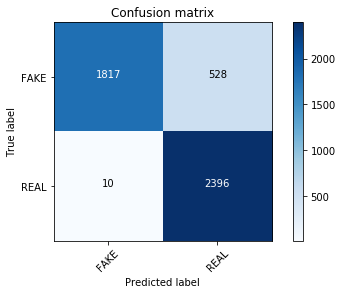

In [33]:
clf_model_a.fit(bin_tfidf_train, bin_y_train)
pred = clf_model_a.predict(bin_tfidf_train)
score = metrics.accuracy_score(bin_y_train, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(bin_y_train, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.826
Confusion matrix, without normalization


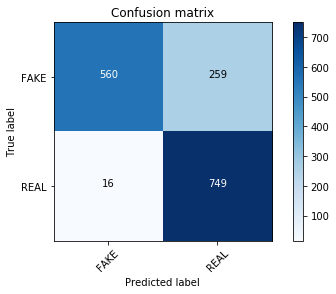

In [34]:
#clf_model_a.fit(bin_tfidf_train, bin_y_train)
pred = clf_model_a.predict(bin_tfidf_test)
score = metrics.accuracy_score(bin_y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(bin_y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])

In [35]:
configuration_1 = {
    "name":"configuration1",
    
    "model":"model_a",
    "model-name":"multinomialNB",


    "dataset":"X1",
    "dataset-name":"fake_or_real_news",
    "dataset-link":"unknown",
    
    "measurement-name":"measurement_config1",
        
    "execution-name":"execution_config1",
    
    "precision":precision,
    "recall":recall,
    "accuracy":score
}

## Configuration 2
* model b - train - [performance measures]
* model b - validation - [performance measures]
* model b - test - [performance measures]

In [36]:
clf_model_b = MultinomialNB()

accuracy:   0.602
Confusion matrix, without normalization


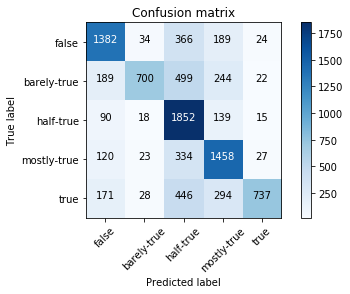

In [37]:
clf_model_b.fit(mul_tfidf_train, mul_y_train)
pred = clf_model_b.predict(mul_tfidf_train)

#print(pred[:20])

score = metrics.accuracy_score(mul_y_train, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(mul_y_train, pred, labels=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])
plot_confusion_matrix(cm, classes=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])

In [38]:
#clf = MultinomialNB()

accuracy:   0.238
Confusion matrix, without normalization


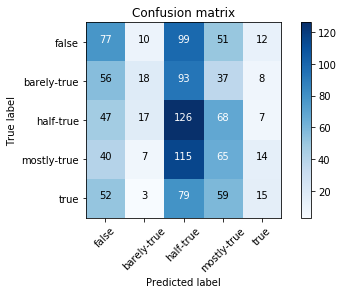

In [39]:
#clf.fit(mul_tfidf_train, mul_y_train)
pred = clf_model_b.predict(mul_tfidf_test)
score = metrics.accuracy_score(mul_y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(mul_y_test, pred, labels=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])
plot_confusion_matrix(cm, classes=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])

In [40]:
#clf_model_b = MultinomialNB()

accuracy:   0.231
Confusion matrix, without normalization


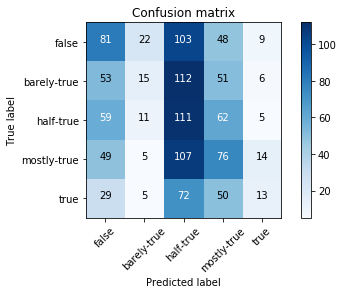

In [41]:
#clf_model_b.fit(mul_tfidf_train, mul_y_train)
pred = clf_model_b.predict(mul_tfidf_valid)
score = metrics.accuracy_score(mul_y_valid, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(mul_y_valid, pred, labels=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])
plot_confusion_matrix(cm, classes=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])

In [42]:
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])

In [43]:
configuration_2 = {
    "name":"configuration2",
    
    "model":"model_a",
    "model-name":"multinomialNB",


    "dataset":"X2",
    "dataset-name":"liar",
    "dataset-link":"unknown",
    
    "measurement-name":"measurement_config2",
        
    "execution-name":"execution_config2",
    
    "precision":precision,
    "recall":recall,
    "accuracy":score
}

## Configuration 3
**In contrast to the discussed true false FAKE REAL bin class approch, I just want to see the expected horible results :)**
* model a - test - dataset2 - [performance measures]
* model b - test - dataset1 - [performance measures]

In [44]:
clf_tmp = MultinomialNB()

In [45]:
#print(type(bin_tfidf_train),type(mul_tfidf_test))

tmp_mul_tfidf_test = bin_tfidf_vectorizer.transform(mul_X_test)

print(mul_y_test[:5])

0          true
1         false
2         false
3     half-true
4    pants-fire
Name: y, dtype: object


In [46]:
clf_tmp.fit(bin_tfidf_train, bin_y_train)
pred = clf_tmp.predict(tmp_mul_tfidf_test)

In [47]:
print(len(pred))
pred = np.array(pred, dtype=object)

pred[pred == "FAKE"] = "false"
pred[pred == "REAL"] = "true"

print(pred[:30])
#pred[pred['FAKE']==false]

1267
['true' 'true' 'true' 'true' 'true' 'true' 'true' 'true' 'true' 'true'
 'true' 'true' 'true' 'true' 'true' 'true' 'false' 'true' 'true' 'true'
 'true' 'true' 'true' 'false' 'false' 'true' 'true' 'true' 'true' 'false']


accuracy:   0.170
Confusion matrix, without normalization


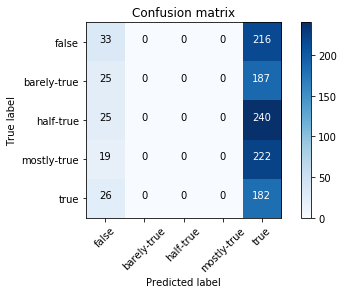

In [48]:
score = metrics.accuracy_score(mul_y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(mul_y_test, pred, labels=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true' ])
plot_confusion_matrix(cm, classes=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])

In [49]:
clf_tmp = MultinomialNB()
#from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier(hidden_layer_sizes=(40,20))

In [50]:
tmp_bin_tfidf_test = mul_tfidf_vectorizer.transform(bin_X_test)

print(mul_y_test[:10])

0           true
1          false
2          false
3      half-true
4     pants-fire
5           true
6           true
7    barely-true
8           true
9    barely-true
Name: y, dtype: object


In [51]:
clf_tmp.fit(mul_tfidf_train, mul_y_train)
pred = clf_tmp.predict(tmp_bin_tfidf_test)

In [52]:
print(pred[:20])

bin_y_test = np.array(bin_y_test, dtype=object)

bin_y_test[bin_y_test == "FAKE"] = "false"
bin_y_test[bin_y_test == "REAL"] = "true"

['half-true' 'false' 'false' 'half-true' 'half-true' 'barely-true' 'false'
 'mostly-true' 'half-true' 'false' 'half-true' 'half-true' 'false' 'false'
 'false' 'half-true' 'half-true' 'half-true' 'false' 'true']


accuracy:   0.220
Confusion matrix, without normalization


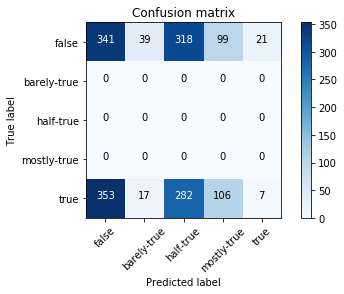

In [53]:
score = metrics.accuracy_score(bin_y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(bin_y_test, pred, labels=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])
plot_confusion_matrix(cm, classes=['false', 'barely-true' , 'half-true' , 'mostly-true' , 'true'])

As expected not these fancy results -.- 

## Configuration 4
* model c - train - [performance measures][0:4]
* model c - test - [performance measures][0:4]

In [54]:
clf_model_c = MultinomialNB()

accuracy:   0.860
Confusion matrix, without normalization


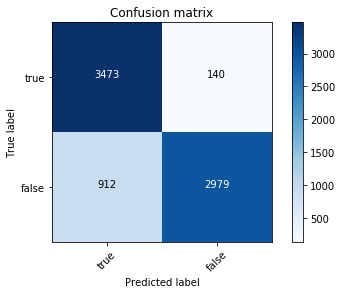

In [55]:
clf_model_c.fit(concat_tfidf_train, concat_y_train)
pred = clf_model_c.predict(concat_tfidf_train)
score = metrics.accuracy_score(concat_y_train, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(concat_y_train, pred, labels=['true',  'false'])
plot_confusion_matrix(cm, classes=['true',  'false'])

In [56]:
#clf = MultinomialNB()

accuracy:   0.749
Confusion matrix, without normalization


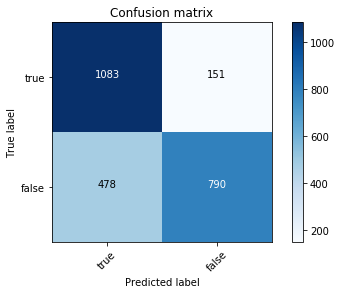

In [57]:
#clf.fit(concat_tfidf_train, concat_y_train)
pred = clf_model_c.predict(concat_tfidf_test)
score = metrics.accuracy_score(concat_y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(concat_y_test, pred, labels=['true',  'false'])
plot_confusion_matrix(cm, classes=['true',  'false'])

In [58]:
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])

In [59]:
configuration_4 = {
    "name":"configuration4",
    
    "model":"model_c",
    "model-name":"multinomialNB",


    "dataset":"X3",
    "dataset-name":"concat",
    "dataset-link":"unknown",
    
    "measurement-name":"measurement_config4",
        
    "execution-name":"execution_config4",
    
    "precision":precision,
    "recall":recall,
    "accuracy":score
}

## Exporting results as RDF data

In [60]:
from rdflib import Namespace, Graph, Literal
from rdflib.namespace import FOAF, OWL, XSD, RDFS, DCTERMS, DOAP, DC, RDF

In [61]:
prov = Namespace('http://www.w3.org/ns/prov#')
dcat = Namespace('http://www.w3.org/ns/dcat#')
mexalgo = Namespace('http://mex.aksw.org/mex-algo#')
mexperf = Namespace('http://mex.aksw.org/mex-perf#')
mexcore = Namespace('http://mex.aksw.org/mex-core#')
this = Namespace('http://mex.aksw.org/examples/')

In [62]:
example_configuration = {
    "name":"experiment1",
    
    "model":"generic_model_1_name",
    "model-name":"deepNN",


    "dataset":"X1",
    "dataset-name":"Liar",
    "dataset-link":"google.com",
    
    "measurement-name":"generic_measurement_hub",
        
    "execution-name":"genereric_execution_name",
    
    "precision":0.33,
    "recall":0.73,
    "accuracy":0.55
}

In [63]:
def experiment_root_graph(root_node_name):
    g = Graph()
    g.add((this[root_node_name],RDF.type, mexcore.Experiment))
    g.add((this[root_node_name],RDF.type, mexcore.ApplicationContext))
    g.add((this[root_node_name],RDFS.label, Literal('2719095')))
    g.add((this[root_node_name],DCTERMS.date, Literal('2018-05-22',datatype=XSD.date)))
    g.add((this[root_node_name],FOAF.givenName, Literal('Carsten')))
    g.add((this[root_node_name],FOAF.mbox, Literal('carsten.draschner@gmail.com')))
    return g ,this[root_node_name]


In [64]:
g, r = experiment_root_graph("first_test")
print(type(r))

<class 'rdflib.term.URIRef'>


In [67]:
#extend a rdf graph with a configuration
def experiment_to_rdf(graph, experiment, root_node):
    
    g.add((this[experiment["name"]],RDF.type,mexcore.ExperimentConfiguration))
    g.add((this[experiment["name"]],prov.used, this[experiment["model"]]))
    g.add((this[experiment["name"]],prov.wasStartedBy, root_node))
    
    #dataset information
    g.add((this[experiment["dataset"]],RDF.type,mexcore.Dataset))
    g.add((this.dataset2,RDFS.label,Literal(experiment["dataset-name"])))
    g.add((this.dataset2,DCTERMS.landingPage,Literal(experiment["dataset-link"])))
    
    #model description
    g.add((this[experiment["model"]],RDF.type,mexalgo.Algorithm))
    g.add((this[experiment["model"]],RDFS.label,Literal(experiment["model-name"])))
    g.add((this[experiment["model"]],DCTERMS.identifier,Literal(experiment["model-name"])))
    ###g.add((this.model1,mexalgo.hasHyperParameter,this.hyerparameter1))
    
    #execution
    g.add((this[experiment["execution-name"]],RDF.type,mexcore.ExecutionOverall))
    g.add((this[experiment["execution-name"]],prov.generated,this[experiment["measurement-name"]]))
    g.add((this[experiment["execution-name"]],prov.used,this.test))
    g.add((this[experiment["execution-name"]],prov.used,this[experiment["model"]]))
    
    #test
    g.add((this.test,RDF.type,mexcore.Test))
    g.add((this.test,RDFS.label,Literal('Test')))
    
    #evaluation information
    g.add((this[experiment["measurement-name"]],RDF.type,mexcore.PerformanceMeasure))
    g.add((this[experiment["measurement-name"]],mexperf.precision,Literal(experiment["precision"],datatype=XSD.float)))
    g.add((this[experiment["measurement-name"]],mexperf.recall,Literal(experiment["recall"],datatype=XSD.float)))
    g.add((this[experiment["measurement-name"]],mexperf.accuracy,Literal(experiment["accuracy"],datatype=XSD.float)))
    g.add((this[experiment["measurement-name"]],prov.wasGeneratedBy,this[experiment["execution-name"]]))


In [68]:
experiment_to_rdf(g,configuration_1,r)
experiment_to_rdf(g,configuration_2,r)
experiment_to_rdf(g,configuration_4,r)

In [69]:
with open('task2_metadata.ttl','wb') as f:
    f.write(g.serialize(format='turtle'))